### Perkenalan

In [1]:
## Nama : Yulia Dwi Susanti
## Program : Full Stack Data Science

### Import Library

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis

%matplotlib inline

### Data Loading

In [117]:
data_1 = pd.read_csv (r'C:\Users\Asus\Desktop\ks-projects-201801.csv', error_bad_lines = False)

In [118]:
df_data_1 = data_1

In [119]:
df_data_1.head ()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [120]:
df_data_1.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


### Data Cleaning

In [121]:
df_data_1.dropna (inplace = True)

In [122]:
df_data_1

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


### Data Exploration

In [123]:
df_data_1.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374860 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374860 non-null  object 
 3   main_category     374860 non-null  object 
 4   currency          374860 non-null  object 
 5   deadline          374860 non-null  object 
 6   goal              374860 non-null  float64
 7   launched          374860 non-null  object 
 8   pledged           374860 non-null  float64
 9   state             374860 non-null  object 
 10  backers           374860 non-null  int64  
 11  country           374860 non-null  object 
 12  usd pledged       374860 non-null  float64
 13  usd_pledged_real  374860 non-null  float64
 14  usd_goal_real     374860 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [124]:
df_data_1.describe ()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.748600e+05,3.748600e+05,3.748600e+05,374860.000000,3.748600e+05,3.748600e+05,3.748600e+05
mean,1.074652e+09,4.952299e+04,9.750538e+03,106.688366,7.036802e+03,9.120899e+03,4.586303e+04
std,6.191368e+08,1.189362e+06,9.601094e+04,911.710124,7.864016e+04,9.131969e+04,1.158767e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.380633e+08,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075289e+09,5.500000e+03,6.200000e+02,12.000000,3.947650e+02,6.244950e+02,5.500000e+03
75%,1.610137e+09,1.650000e+04,4.080000e+03,57.000000,3.034425e+03,4.050895e+03,1.600000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [125]:
df_data_1.head (1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95


In [126]:
main_category = df_data_1.groupby (['main_category'], as_index = False) ['goal'].count ()\
                      .rename (columns = {'goal':'Total'})\
                      .sort_values ('Total', ascending = False)

In [127]:
main_category

,main_category,Total
6,Film & Video,62696
10,Music,49530
12,Publishing,39379
8,Games,35225
13,Technology,32562
4,Design,30066
0,Art,28152
7,Food,24599
5,Fashion,22812
14,Theater,10912


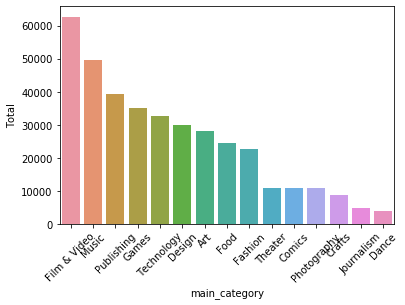

In [128]:
sns.barplot (data = main_category, x = 'main_category', y='Total')
plt.xticks (rotation = 45)
plt.show ()

In [129]:
country = df_data_1.groupby (['country'], as_index = False) ['goal'].count ()\
                      .rename (columns = {'goal':'Total'})\
                      .sort_values ('Total', ascending = False)

In [130]:
country

,country,Total
21,US,292624
9,GB,33671
3,CA,14756
1,AU,7839
5,DE,4171
8,FR,2939
12,IT,2878
16,NL,2868
7,ES,2276
19,SE,1757


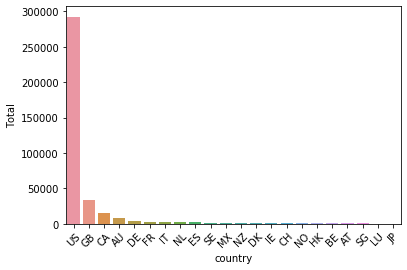

In [131]:
sns.barplot (data = country, x = 'country', y='Total')
plt.xticks (rotation = 45)
plt.show ()

In [132]:
state = df_data_1.groupby (['state'], as_index = False)['goal'].count ()\
                 .rename (columns = {'goal':'Total'})\
                 .sort_values ('Total', ascending = False)

In [133]:
state

,state,Total
1,failed,197611
3,successful,133851
0,canceled,38757
2,live,2798
4,suspended,1843


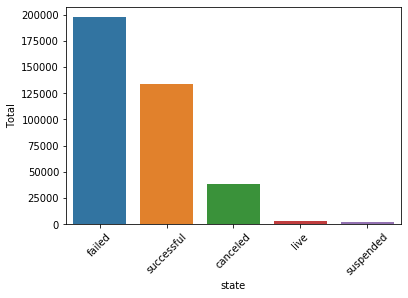

In [134]:
sns.barplot (data = state, x = 'state', y = 'Total')
plt.xticks (rotation = 45)
plt.show ()

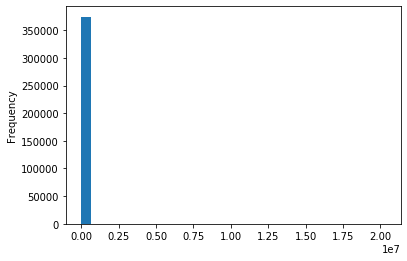

In [135]:
df_data_1['usd_pledged_real'].plot.hist(bins=30, density=False)

In [136]:
df_data_1_filter = df_data_1[df_data_1['usd_pledged_real']<=50000]

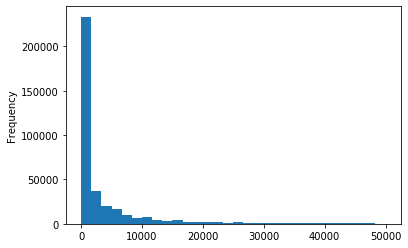

In [137]:
df_data_1_filter['usd_pledged_real'].plot.hist(bins=30, density=False)

In [138]:
df_data_1_filter.groupby ('main_category').count ()

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,,,,,,,,,
Art,27960,27960,27960,27960,27960,27960,27960,27960,27960,27960,27960,27960,27960,27960
Comics,10577,10577,10577,10577,10577,10577,10577,10577,10577,10577,10577,10577,10577,10577
Crafts,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781
Dance,3759,3759,3759,3759,3759,3759,3759,3759,3759,3759,3759,3759,3759,3759
Design,27630,27630,27630,27630,27630,27630,27630,27630,27630,27630,27630,27630,27630,27630
Fashion,22349,22349,22349,22349,22349,22349,22349,22349,22349,22349,22349,22349,22349,22349
Film & Video,61346,61346,61346,61346,61346,61346,61346,61346,61346,61346,61346,61346,61346,61346
Food,24312,24312,24312,24312,24312,24312,24312,24312,24312,24312,24312,24312,24312,24312
Games,32971,32971,32971,32971,32971,32971,32971,32971,32971,32971,32971,32971,32971,32971


### Central Tendency

In [158]:
print(df_data_1_filter['usd_pledged_real'].describe())
df_data_1['usd_pledged_real'].describe()['mean']


count    364278.000000
mean       3559.697361
std        7103.318550
min           0.000000
25%          28.000000
50%         551.000000
75%        3487.502500
max       50000.000000
Name: usd_pledged_real, dtype: float64


9120.898548951884

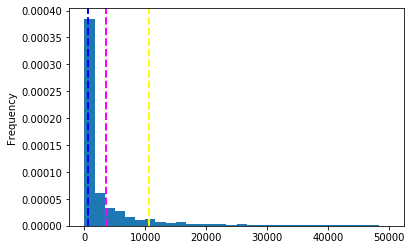

In [140]:
df_data_1_filter['usd_pledged_real'].plot.hist(bins=30,density=True)
plt.axvline(df_data_1_filter['usd_pledged_real'].describe()['mean'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_data_1_filter['usd_pledged_real'].describe()['50%'], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(df_data_1_filter['usd_pledged_real'].describe()['mean']+df_filt['usd_pledged_real'].describe()['std']
            , color='yellow', linestyle='dashed', linewidth=2)

### Chi Square Test

In [142]:
df_pivot=df_data_1_filter.groupby(['main_category','state']).count()[['goal','usd_pledged_real']].reset_index()

In [143]:
df_pivot

,main_category,state,goal,usd_pledged_real
0,Art,canceled,2222,2222
1,Art,failed,14120,14120
2,Art,live,192,192
3,Art,successful,11330,11330
4,Art,suspended,96,96
...,...,...,...,...
70,Theater,canceled,605,605
71,Theater,failed,3707,3707
72,Theater,live,41,41
73,Theater,successful,6441,6441


In [148]:
df_pivot = df_pivot.pivot(index="main_category",columns="state", values='usd_pledged_real').fillna(0)

In [149]:
df_pivot

state,canceled,failed,live,successful,suspended
main_category,,,,,
Art,2222,14120,192,11330,96
Comics,842,4035,76,5601,23
Crafts,842,5702,76,2089,72
Dance,163,1235,18,2330,13
Design,4108,14746,276,8276,224
Fashion,2646,14172,248,5148,135
Film & Video,5721,32810,332,22367,116
Food,2208,15960,180,5813,151
Games,6127,15933,281,10415,215


In [150]:
chisq, pvalue, df, expected = stats.chi2_contingency (df_pivot)
print(f'Observed chi2: {chisq:.2f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 24577.23
p-value: 0.0000


### Correlation and Variance

In [151]:
df_data_1_filter.corr ()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001755,-0.001286,-0.000166,-0.002359,-0.001164,0.001977
goal,0.001755,1.000000,0.006465,-0.009755,-0.006514,-0.007305,0.942719
pledged,-0.001286,0.006465,1.000000,0.463989,0.528063,0.623154,-0.004502
backers,-0.000166,-0.009755,0.463989,1.000000,0.667565,0.744424,-0.009232
usd pledged,-0.002359,-0.006514,0.528063,0.667565,1.000000,0.897164,-0.005481
usd_pledged_real,-0.001164,-0.007305,0.623154,0.744424,0.897164,1.000000,-0.006613
usd_goal_real,0.001977,0.942719,-0.004502,-0.009232,-0.005481,-0.006613,1.000000


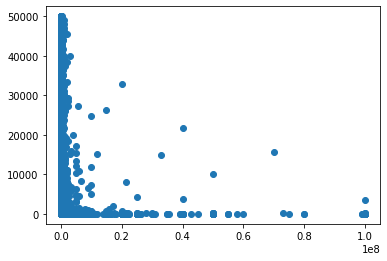

In [153]:
plt.scatter(df_data_1_filter['goal'],df_data_1_filter['usd_pledged_real'])

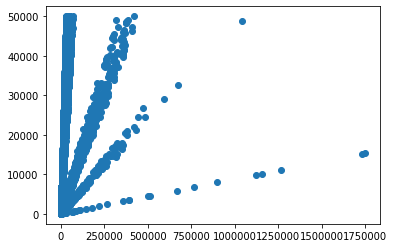

In [154]:
plt.scatter(df_data_1_filter['pledged'],df_data_1_filter['usd_pledged_real'])

In [155]:
## terdapat korelasi yang cukup kuat antara pledge dengan usd_pledged_real dimana dengan nilai korelasi>0.5 terjadi korelasi

### Kesimpulan

Dengan nilai p-value: 0.0000 maka H0 diterima